# Sentiment Dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv('combined_sentiment_data.csv')
df.head(1)

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative


In [3]:
df.isnull().sum()

sentence     0
sentiment    0
dtype: int64

In [4]:
df['sentence'].str.isspace().sum()

np.int64(0)

In [5]:
df['sentiment'].value_counts()

sentiment
positive    1679
negative    1630
Name: count, dtype: int64

## Preprocessing

In [6]:
X = df['sentence']
y = df['sentiment']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [10]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC(gamma='scale'))])

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
y_pred = pipe.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.83       334
    positive       0.83      0.84      0.83       328

    accuracy                           0.83       662
   macro avg       0.83      0.83      0.83       662
weighted avg       0.83      0.83      0.83       662



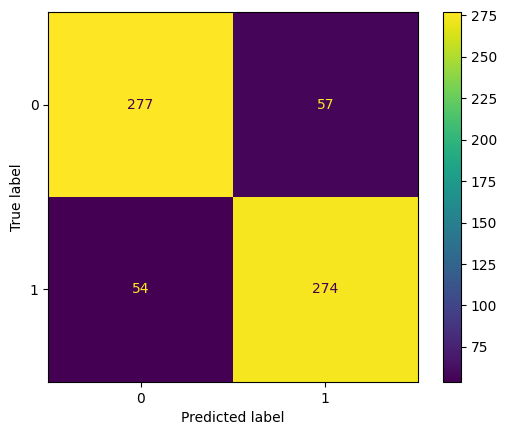

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params={'svc__C':[0.1, 0.5, 1, 2, 3],
        'svc__degree': range(1, 6),
        'svc__kernel':['linear', 'rbf', 'poly']
        }

In [18]:
grid = GridSearchCV(pipe, param_grid=params)

In [19]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 0.5, 1, 2, 3],
                         'svc__degree': range(1, 6),
                         'svc__kernel': ['linear', 'rbf', 'poly']})

In [24]:
grid.best_params_

{'svc__C': 2, 'svc__degree': 1, 'svc__kernel': 'rbf'}

In [21]:
y_pred = grid.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       334
    positive       0.85      0.86      0.85       328

    accuracy                           0.85       662
   macro avg       0.86      0.86      0.85       662
weighted avg       0.86      0.85      0.85       662



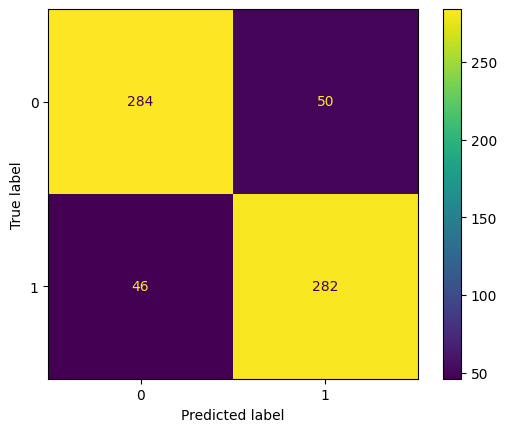

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()